In [104]:
#load the data and data cleaning
import pandas as pd

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#model building
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Load Data

In [46]:
data = pd.read_csv('C:/Users/nikhi/OneDrive/Documents/Self Projects/Kaggle Projects/Spaceship/train.csv')

In [47]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Data Exploration

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [49]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Data Cleaning

In [50]:
#filling null values of numerical columns using mean value
data['Age']=data['Age'].fillna(data['Age'].mean())
data['RoomService']=data['RoomService'].fillna(data['RoomService'].mean())
data['FoodCourt']=data['FoodCourt'].fillna(data['FoodCourt'].mean())
data['ShoppingMall']=data['ShoppingMall'].fillna(data['ShoppingMall'].mean())
data['Spa']=data['Spa'].fillna(data['Spa'].mean())
data['VRDeck']=data['VRDeck'].fillna(data['VRDeck'].mean())

#filling null values of categorical value using mode value
data['HomePlanet']=data['HomePlanet'].fillna(data['HomePlanet'].mode()[0])
data['CryoSleep']=data['CryoSleep'].fillna(data['CryoSleep'].mode()[0])
data['Destination']=data['Destination'].fillna(data['Destination'].mode()[0])
data['VIP']=data['VIP'].fillna(data['VIP'].mode()[0])
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0])

In [51]:
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [52]:
#displaying unique values of some attributes for data analysis
print("Unique Values")

print("HomePlanet:", data.HomePlanet.unique())
print("CryoSleep:", data.CryoSleep.unique())
print("Destination:", data.Destination.unique())
print("VIP:", data.VIP.unique())

Unique Values
HomePlanet: ['Europa' 'Earth' 'Mars']
CryoSleep: [False  True]
Destination: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
VIP: [False  True]


Feature Engineering

In [53]:
data['Cabin_side'] = data['Cabin'].apply(lambda x: x.split('/')[2])
data['Cabin_side'].unique()

array(['P', 'S'], dtype=object)

In [54]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,S


In [55]:
df = data
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,S


In [56]:
df.HomePlanet = df.HomePlanet.map({'Europa':0,'Earth':1,'Mars':2})
df.Cabin_side = df.Cabin_side.map({'P':0,'S':1})
df.Destination = df.Destination.map({'TRAPPIST-1e':0,'PSO J318.5-22':1,'55 Cancri e':2})

In [57]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_side
0,0001_01,0,False,B/0/P,0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0
1,0002_01,1,False,F/0/S,0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1
2,0003_01,0,False,A/0/S,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1
3,0003_02,0,False,A/0/S,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1
4,0004_01,1,False,F/1/S,0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1


In [58]:
df["CryoSleep"].replace(False,0,inplace=True)
df["CryoSleep"].replace(True,1,inplace=True)
df["VIP"].replace(False,0,inplace=True)
df["VIP"].replace(True,1,inplace=True)
df["Transported"].replace(False,0,inplace=True)
df["Transported"].replace(True,1,inplace=True)

In [59]:
#drop unwanted columns, Name, Cabin
df = df.drop(['Name', 'Cabin'], axis = 1)

In [88]:
df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Cabin_side      0
dtype: int64

In [60]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_side
0,0001_01,0,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0
1,0002_01,1,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1
2,0003_01,0,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1
3,0003_02,0,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1
4,0004_01,1,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1


In [61]:
df.describe()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_side
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.957207,0.349362,0.505694,28.827930,0.022892,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624,0.516162
std,0.667613,0.476796,0.814966,14.339054,0.149568,659.739364,1594.434978,597.417440,1124.675871,1133.259049,0.500016,0.499767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,37.000000,0.000000,78.000000,118.000000,45.000000,89.000000,71.000000,1.000000,1.000000
max,2.000000,1.000000,2.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,1.000000


Data Visualization

<Axes: xlabel='Transported', ylabel='count'>

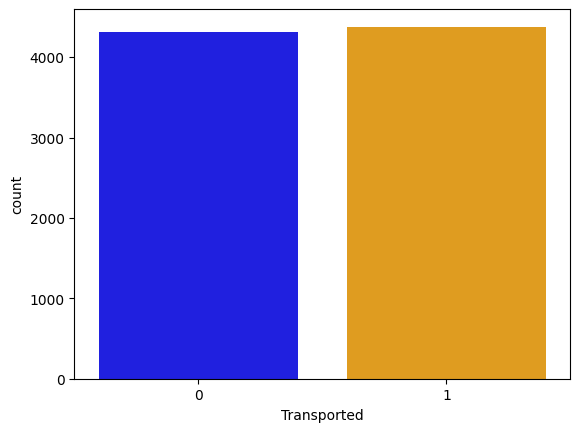

In [67]:
#how many people has been transported
sns.countplot(x ='Transported', data = df, palette = ['blue', 'orange'])

<Axes: xlabel='VIP', ylabel='count'>

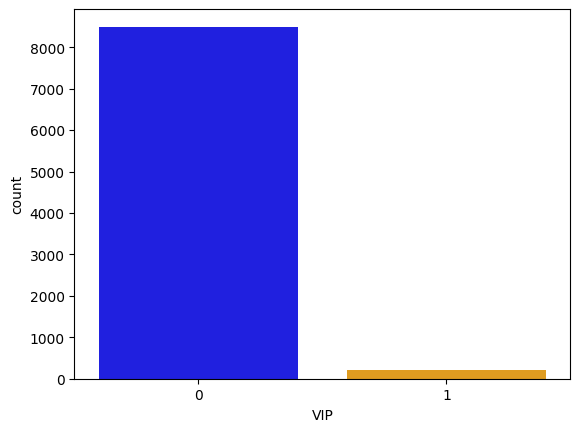

In [68]:
#how many VIPs
sns.countplot(x='VIP', data=df, palette=['blue', 'orange'])

In [71]:
#how many VIPs have been transported
VIP_transported = df.groupby('VIP').agg('sum')[['Transported']]

C:\Users\nikhi\AppData\Local\Temp\ipykernel_3776\583818532.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  VIP_transported = df.groupby('VIP').agg('sum')[['Transported']]


In [76]:
VIP_transported

,Transported
VIP,
0,4302
1,76


<Axes: xlabel='VIP'>

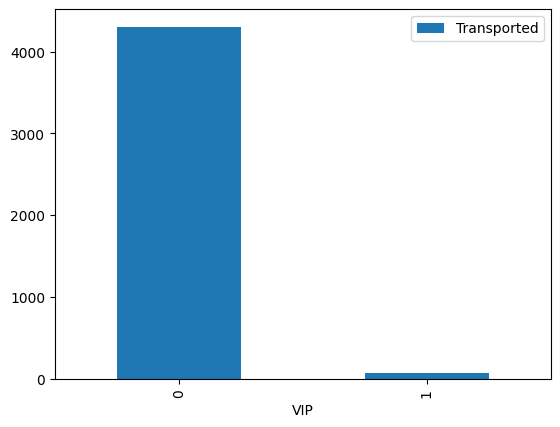

In [75]:
VIP_transported.plot(kind='bar')

C:\Users\nikhi\AppData\Local\Temp\ipykernel_3776\1790391298.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidth=0.4, cmap='magma')


<Axes: >

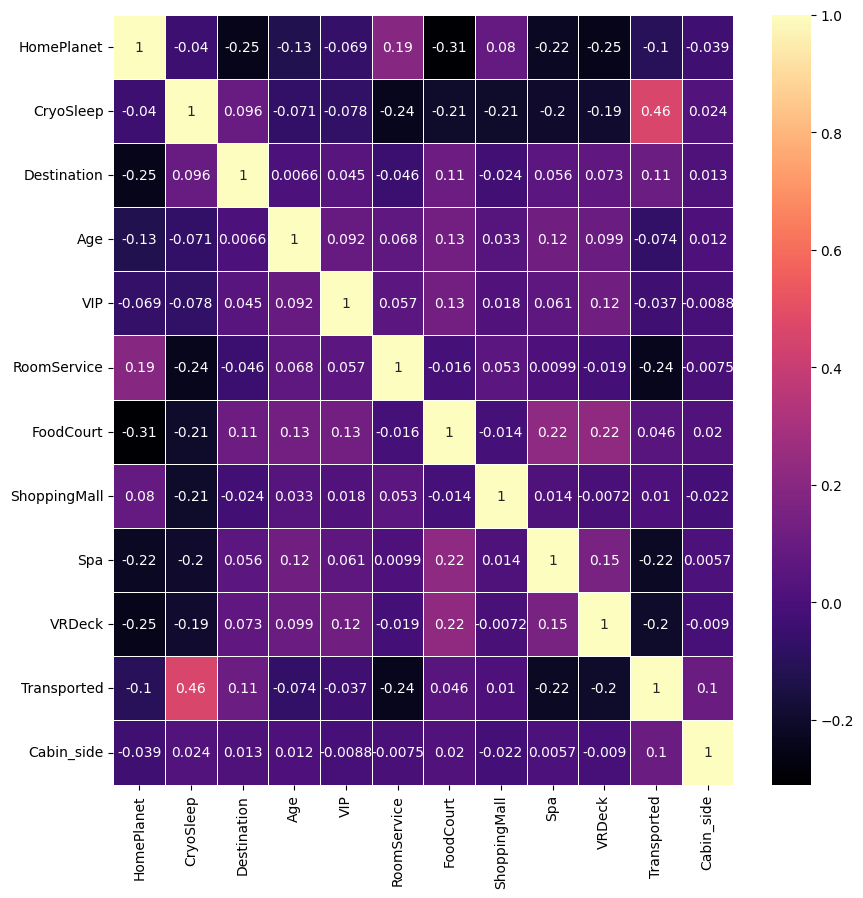

In [89]:
#correlation heatmap

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidth=0.4, cmap='magma')

Spitting Data

In [92]:
X = df.drop(['Transported'], axis=1)
Y = df.Transported

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

SVM Model Building

In [97]:
model = SVC()

In [98]:
model.fit(X_train, Y_train)

SVC()

Prediction

In [99]:
prediction = model.predict(X_test)

In [107]:
prediction

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

Accuracy

In [109]:
print("Accuracy score : ", accuracy_score(Y_test, prediction))

Accuracy score :  0.5341257668711656
